<div align="center" style=" font-size: 80%; text-align: center; margin: 0 auto">
<img src="https://raw.githubusercontent.com/Explore-AI/Pictures/master/Python-Notebook-Banners/Exercise.png"  style="display: block; margin-left: auto; margin-right: auto;";/>
</div>

# Exercise: K-means clustering
© ExploreAI Academy

In this exercise, we will test our understanding of the core concepts of building optimal K-means clustering models.

## Learning Objectives
By the end of this train, you should be able to:
- Implement a K-means clustering model in sklearn

## Import libraries and read in the data

In [2]:
# data processing
import numpy as np
import pandas as pd
import datetime
from sklearn import preprocessing
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler

# plotting
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
df = pd.read_csv('https://raw.githubusercontent.com/Explore-AI/Public-Data/master/Data/unsupervised_sprint/Live.csv')
df

,status_id,status_type,status_published,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,Column1,Column2,Column3,Column4
0,246675545449582_1649696485147474,video,4/22/2018 6:00,529,512,262,432,92,3,1,1,0,NaN,NaN,NaN,NaN
1,246675545449582_1649426988507757,photo,4/21/2018 22:45,150,0,0,150,0,0,0,0,0,NaN,NaN,NaN,NaN
2,246675545449582_1648730588577397,video,4/21/2018 6:17,227,236,57,204,21,1,1,0,0,NaN,NaN,NaN,NaN
3,246675545449582_1648576705259452,photo,4/21/2018 2:29,111,0,0,111,0,0,0,0,0,NaN,NaN,NaN,NaN
4,246675545449582_1645700502213739,photo,4/18/2018 3:22,213,0,0,204,9,0,0,0,0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7045,1050855161656896_1061863470556065,photo,9/24/2016 2:58,89,0,0,89,0,0,0,0,0,NaN,NaN,NaN,NaN
7046,1050855161656896_1061334757275603,photo,9/23/2016 11:19,16,0,0,14,1,0,1,0,0,NaN,NaN,NaN,NaN
7047,1050855161656896_1060126464063099,photo,9/21/2016 23:03,2,0,0,1,1,0,0,0,0,NaN,NaN,NaN,NaN
7048,1050855161656896_1058663487542730,photo,9/20/2016 0:43,351,12,22,349,2,0,0,0,0,NaN,NaN,NaN,NaN


## The data
The dataset we will use in this exercise pertains to Facebook live sellers. It comprises various attributes related to live posts made by sellers on the platform. Each row in the dataset represents a specific live post made by a seller. The data includes attributes such as the type of status or the type of post (e.g., video, photo), the number of reactions, comments, shares, likes, loves, wows, hahas, sad, and angry reactions received by the post.

The data was collected to understand the engagement and interaction patterns of Facebook live sellers. By analysing the reactions, comments, and shares received by different types of posts, the aim is to gain insights into the effectiveness of various content formats used by sellers. Understanding these patterns can help in devising strategies to improve engagement, reach, and, ultimately, sales for live sellers on the platform.


## Exercises
In this exercise, we want to apply K-means clustering to our data in order to segment the live posts made by sellers into distinct groups based on their engagement metrics. By clustering similar posts together, we aim to identify patterns or clusters that can help us understand the characteristics of highly engaging posts versus less engaging ones. This segmentation can provide valuable insights for sellers and marketers to tailor their content strategies more effectively, potentially increasing audience engagement and sales.

### Exercise 1: Data pre-processing
Before we can apply any analysis to our data, we need to ensure that the dataset is clean, structured, and suitable for analysis.

#### Exercise 1.1
Our dataset contains redundant columns that need to be removed. Identify these columns and drop them from the data.

In [ ]:
#Your code here


#### Exercise 1.2
An essential step in our process is identifying potential label columns, which represent the target variables we could cluster on. In the context of unsupervised learning, we don't have a designated target variable to predict; however, we can still identify a column that could contain categorical information for which we could cluster our data on.

Examine the dataset's attributes and determine which one best represents the categorical information we can cluster on.

> **Hint**: Our dataset has three categorical attributes. That's a good place to start.

In [ ]:
# Your code here

#### Exercise 1.3

K-means clustering operates on numerical data and calculates distances between data points based on their numerical attributes. Categorical variables, such as `status_type`, `status_published` and `status_id` cannot be directly used in distance-based algorithms like K-means.

We need the status_type column to use as a categorical column to cluster our data on. However, the rest of the categorical columns will not contribute meaningfully to the clustering process. They contain unique identifiers that do not represent meaningful clusters; keeping them in the analysis would add noise and complexity without enhancing the clustering outcome.

Furthermore, the `status_type` column needs to be converted into numerical equivalents to make it compatible with the clustering algorithm.

Drop the remaining categorical columns and convert the `status_type` column values to their numerical equivalents.

> **Hint**: To make this process easier, you can use a library called LabelEncoder, which is a utility that is used in machine learning to transform categorical labels into numerical values. Read about it [here](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelEncoder.html)

In [ ]:
from sklearn.preprocessing import LabelEncoder
#Instantiate the encoder
le = LabelEncoder()
#Your code here


### Exercise 2: Feature scaling

The next step in our process is feature scaling. By scaling the features to a uniform range, we prevent attributes with larger magnitudes from dominating the distance calculations, thus ensuring more balanced clustering results.

Perform feature scaling using `MinMaxScaler` on the dataset to ensure that all features contribute equally to the clustering process.


In [ ]:
#Your code here

### Exercise 3: K-means clustering on a random number of K

Now that we have pre-processed and scaled our data, we can now apply K-means clustering to segment the live posts made by sellers into distinct groups based on their engagement metrics. 

To start with, let's apply the K-means clustering algorithm to the pre-processed and scaled dataset using a random number of clusters (K). The purpose is to initially explore the data's clustering tendencies and assess the model's performance with different K values. By fitting the K-means model with varying numbers of clusters, we can observe how the data partitions into different groups and evaluate the model's clustering quality.

#### Exercise 3.1

Apply the K-means model using 6 clusters to start and print the coordinates of the centroids of the clusters that were found by the algorithm.


In [ ]:
#Your code here

#### Exercise 3.2


Evaluate the performance of our model by calculating its silhouette_score.

In [ ]:
#Your code here

### Exercise 4: Finding the best K Value

An average silhouette score of 0.7561 suggests a relatively good clustering structure, though not as strong as a score closer to 1. 

Instead of trying to guess the best number of clusters to use, let's use one of the many methods we have at our disposal to find the best K value.

#### Exercise 4.1

Use the Elbow method to find the best K value for our data.

In [ ]:
#Your code here

#### Exercise 4.2
We see that there is a kink at K=2. Therefore, K=2 can be considered a good number on which to cluster our data.

Based on these results, let's evaluate the performance of our model by calculating the `silhouette_score`. However, this time, let's calculate and plot the silhouette scores for different numbers of clusters, with each point on the plot representing the average silhouette score for a specific number of clusters. This will allow us to analyse the plot and determine the optimal number of clusters for our data based on the highest silhouette score.

Calculate and plot the silhouette scores for cluster values from `K=2` to `K=10` clusters.

In [ ]:
#Your code here

## Solutions
### Exercise 1: Data pre-processing
#### Exercise 1.1

In [4]:
print("Dataset with redundant columns......")
df.info()
df.drop(['Column1', 'Column2', 'Column3', 'Column4'], axis=1, inplace=True)
print("Dataset without reduntant columns.....")
df.info()

Dataset with redundant columns......
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7050 entries, 0 to 7049
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   status_id         7050 non-null   object 
 1   status_type       7050 non-null   object 
 2   status_published  7050 non-null   object 
 3   num_reactions     7050 non-null   int64  
 4   num_comments      7050 non-null   int64  
 5   num_shares        7050 non-null   int64  
 6   num_likes         7050 non-null   int64  
 7   num_loves         7050 non-null   int64  
 8   num_wows          7050 non-null   int64  
 9   num_hahas         7050 non-null   int64  
 10  num_sads          7050 non-null   int64  
 11  num_angrys        7050 non-null   int64  
 12  Column1           0 non-null      float64
 13  Column2           0 non-null      float64
 14  Column3           0 non-null      float64
 15  Column4           0 non-null      float64
dtypes: fl

#### Exercise 1.2

In [5]:
# view how many different types of categories there are in the status_id column, if any
print("There are",len(df['status_id'].unique()),"unique labels in the status_id column")
# view how many different types of categories there are in the status_published column, if any
print("There are",len(df['status_published'].unique()),"unique labels in the status_published column")
# view how many different types of categories there are in the status_type column, if any
print("There are",len(df['status_type'].unique()), "unique labels in the status_id column")

There are 6997 unique labels in the status_id column
There are 6913 unique labels in the status_published column
There are 4 unique labels in the status_id column


The total number of rows in our dataset is 7050, which makes `status_id` and `status_published` approximate unique identifiers for each of our instances. Therefore, they are not categorical columns we can use to cluster on.

There are four categories of labels in the `status_type` column. This is the categorical column we can use in our analysis.

#### Exercise 1.3

In [6]:
# Drop the remaining categorical columns
df.drop(['status_id', 'status_published'], axis=1, inplace=True)

In [7]:
from sklearn.preprocessing import LabelEncoder
#Instantiate the encoder
le = LabelEncoder()
df['status_type'] = le.fit_transform(df['status_type'])
df

,status_type,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
0,3,529,512,262,432,92,3,1,1,0
1,1,150,0,0,150,0,0,0,0,0
2,3,227,236,57,204,21,1,1,0,0
3,1,111,0,0,111,0,0,0,0,0
4,1,213,0,0,204,9,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
7045,1,89,0,0,89,0,0,0,0,0
7046,1,16,0,0,14,1,0,1,0,0
7047,1,2,0,0,1,1,0,0,0,0
7048,1,351,12,22,349,2,0,0,0,0


### Exercise 2: Feature scaling

In [8]:
from sklearn.preprocessing import MinMaxScaler

ms = MinMaxScaler()

X_scaled = ms.fit_transform(df)

#### Exercise 3: K-means clustering on a random  number of K
#### Exercise 3.1

In [9]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=6, random_state=0) 

kmeans.fit(X_scaled)

KMeans(n_clusters=6, random_state=0)

In [10]:
print(kmeans.cluster_centers_)

[[ 6.66666667e-01  6.21541972e-02  1.46110799e-03  6.95703724e-04
   6.15039452e-02  2.39896408e-03  3.30720498e-03  7.60528567e-04
   8.25285338e-03  8.66634569e-04]
 [ 3.29309354e-01  1.68648841e-02  6.24577384e-04  4.88990659e-04
   1.64533325e-02  1.66118999e-03  1.73165237e-03  1.07961705e-03
   2.85494834e-03  1.52588036e-03]
 [ 1.00000000e+00  3.71757948e-02  2.33386251e-02  2.45079066e-02
   3.14693670e-02  3.74459054e-02  2.43389050e-03  7.25514265e-03
   5.86496848e-03  5.14804389e-03]
 [ 4.12393162e-01  4.94083782e-01  3.43631277e-03  3.52339444e-03
   4.92472372e-01  6.45904071e-03  1.10680686e-02  1.55152703e-03
   5.02765209e-04 -9.10729825e-18]
 [ 1.00000000e+00  3.07527504e-01  1.14459139e-01  1.40491466e-01
   2.65879855e-01  2.46046281e-01  8.20220829e-02  5.48043189e-02
   3.40778022e-02  4.32982577e-02]
 [ 3.07843137e-01  2.40671912e-01  2.21281843e-03  4.97869709e-03
   2.38281504e-01  1.04396096e-02  1.34151502e-02  3.52191832e-03
   1.84544406e-03  7.59013283e-04

#### Exercise 3.2

In [11]:
from sklearn.metrics import silhouette_score

# Calculate the silhouette score
silhouette_avg = silhouette_score(X_scaled, kmeans.labels_)

print("The average silhouette_score is :", silhouette_avg)

The average silhouette_score is : 0.7561086048749246


### Exercise 4: Finding the best K value
#### Exercise 4.1

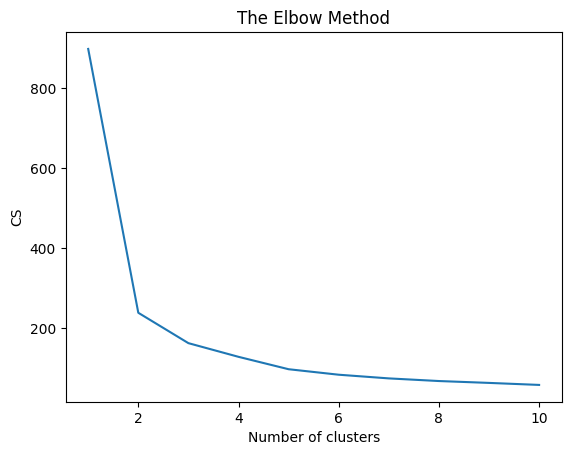

In [12]:
cs = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(X_scaled)
    cs.append(kmeans.inertia_)
plt.plot(range(1, 11), cs)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('CS')
plt.show()

#### Exercise 4.2

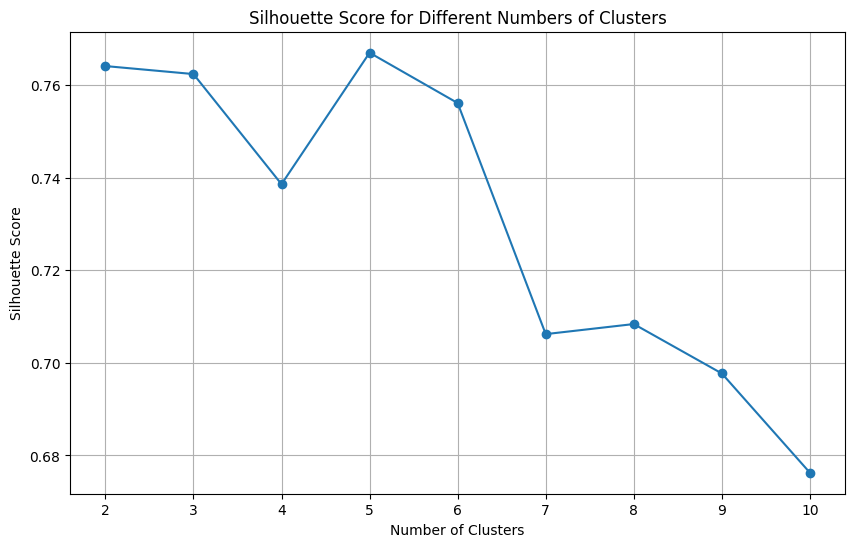

In [13]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import silhouette_score

# List to store silhouette scores
silhouette_scores = []

# Range of clusters to try
num_clusters_range = range(2, 11)

# Iterate over different numbers of clusters
for num_clusters in num_clusters_range:
    # Train KMeans model with num_clusters clusters
    kmeans = KMeans(n_clusters=num_clusters, random_state=0)
    kmeans.fit(X_scaled)
    
    # Calculate silhouette score
    silhouette_avg = silhouette_score(X_scaled, kmeans.labels_)
    silhouette_scores.append(silhouette_avg)

# Plotting silhouette scores
plt.figure(figsize=(10, 6))
plt.plot(num_clusters_range, silhouette_scores, marker='o', linestyle='-')
plt.title('Silhouette Score for Different Numbers of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.xticks(np.arange(min(num_clusters_range), max(num_clusters_range)+1, 1.0))
plt.grid(True)
plt.show()

**Note**: Differences in Python and library versions may result in varied clustering outcomes, complicating the task of determining the optimal number of clusters. It's crucial to remain mindful of this potential variability during your analysis.

This plot suggests that `5` would be the best K value for our data giving us the highest silhouette score. 

The results of the elbow method and silhouette scores seem to contradict each other when it comes to the best K value that will give the highest cluster quality. Remember that the elbow method and silhouette scores measure different aspects of cluster quality. While the elbow method provides an indication of the optimal number of clusters based on inertia, silhouette scores assess the compactness and separation of clusters.

A possible reason for this contradiction is that the elbow method relies on minimising the **within-cluster sum of squares (inertia)**, which may not always reflect the underlying structure of the data, especially if the clusters are non-spherical or have varying densities. Silhouette scores, on the other hand, consider both cluster cohesion and separation, providing a more nuanced evaluation of cluster quality.

In this case, the next step would be to consider different clustering algorithms and quality evaluation methods, which may produce varying results for the same dataset. The elbow method and silhouette scores may reflect the strengths and weaknesses of different algorithms differently.



#  

<div align="center" style=" font-size: 80%; text-align: center; margin: 0 auto">
<img src="https://raw.githubusercontent.com/Explore-AI/Pictures/master/ExploreAI_logos/EAI_Blue_Dark.png"  style="width:200px";/>
</div>